In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from datetime import datetime

x, y, t = [], [], []
for m in xrange(1, 13):
    src = np.load('../data/datasets/seville-sn-1-2017%02d21.npz' % m)
    x.append(src['x'])
    y.append(src['y'])
    t.append(src['t'])
x = np.array(x)
y = np.array(y)
t = np.array(t)
print x.shape, y.shape, t.shape, x[0].shape, y[0].shape, t[0].shape
print x[0].min(), x[0].max()

(12,) (12,) (12,) (7560, 2) (7560,) (7560,)
-3.00041443506 9.40250011731


In [149]:
def time2area(tt):
    s = tt.second / 60.
    m = tt.minute / 60.
    h = tt.hour / 12.
    return h + .1 * m + .01 * s

print "Example:", t[0][0].time(), t[0][0].hour, t[0][0].minute, t[0][0].second, time2area(t[0][0])

Example: 07:34:18.578049 7 34 18 0.643


In [150]:
for m in xrange(12):
    t[m] = np.array([(time2area(datetime(2017, 6, 21, 12, 0, 0)) - time2area(tt)) for tt in t[m]])

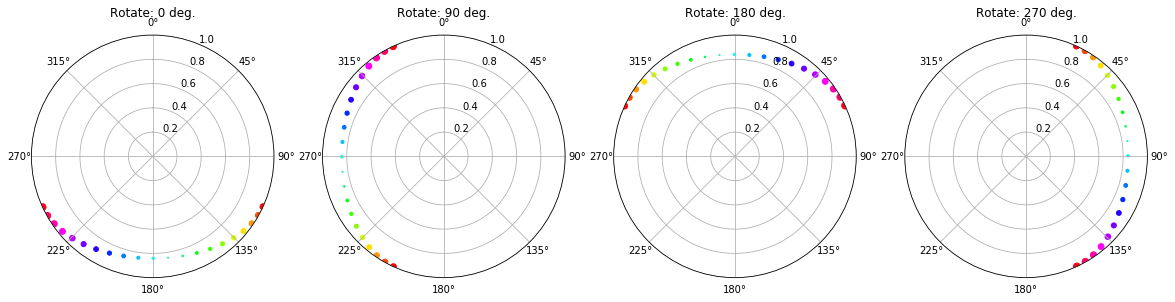

In [151]:
m = 1
plt.figure(1, figsize=(20, 5))
rot = 0
# print x[y==rot]
ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 0 deg.")
rot = 90
ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 90 deg.")
rot = 180
ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 180 deg.")
rot = 270
ax = plt.subplot(144, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 270 deg.")
plt.show()

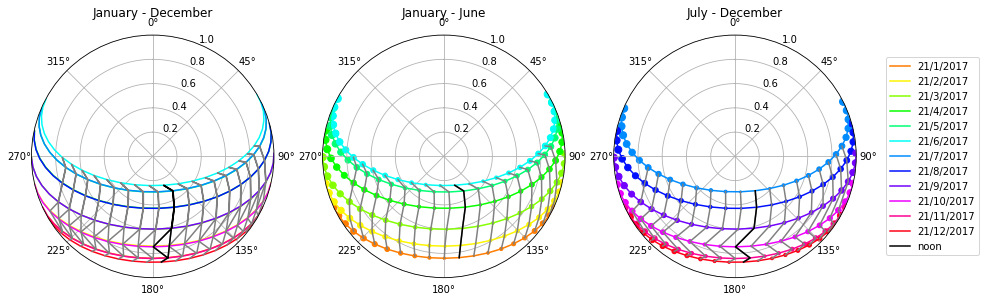

In [152]:
plt.figure(1, figsize=(20, 5))
rot = 0

ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
n, ns = [], []
for m in xrange(1, 13):
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.), label="21/%0d/2017" % m)
    i = np.argmin(np.abs(t[m-1][y[m-1]==rot]))
    n.append(x[m-1][y[m-1]==rot][i])
    ns.append(x[m-1][y[m-1]==rot][i-8:i+9])
n = np.array(n)
ns = np.array(ns)
for i in xrange(ns.shape[1]):
    plt.plot(ns[:, i, 0], np.sin(ns[:, i, 1]), color='grey')
plt.plot(n[:, 0], np.sin(n[:, 1]), color='k', label="noon")
plt.ylim([0, 1])
plt.title("January - December")
plt.legend(loc="center left", bbox_to_anchor=(3.5, .5))

ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(1, 7):
    plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
for i in xrange(ns.shape[1]):
    plt.plot(ns[:6, i, 0], np.sin(ns[:6, i, 1]), color='grey')
plt.plot(n[:6, 0], np.sin(n[:6, 1]), color='k')
plt.ylim([0, 1])
plt.title("January - June")

ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(7, 13):
    plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
for i in xrange(ns.shape[1]):
    plt.plot(ns[6:, i, 0], np.sin(ns[6:, i, 1]), color='grey')
plt.plot(n[6:, 0], np.sin(n[6:, 1]), color='k')
plt.ylim([0, 1])
plt.title("July - December")
plt.show()

In [153]:
d_x, d_y = [], []
for m in xrange(12):
    d_x.append((x[m][1:] - x[m][:-1]) / 18e+2)
    d_y.append(y[m][1:])
d_x = np.array(d_x)
d_y = np.array(d_y)

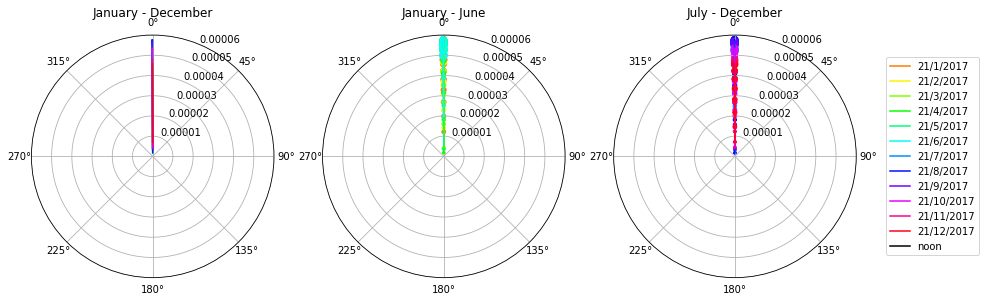

In [155]:
plt.figure(1, figsize=(20, 5))
rot = 0

ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
n = []
for m in xrange(1, 13):
    plt.plot(d_x[m-1][d_y[m-1]==rot][:, 0], d_x[m-1][d_y[m-1]==rot][:, 1], color=cmx.hsv(m/12.), label="21/%0d/2017" % m)
    i = np.argmin(np.abs(t[m-1][1:][d_y[m-1]==rot]))
    n.append(d_x[m-1][d_y[m-1]==rot][i])
n = np.array(n)
plt.plot(n[:, 0], np.sin(n[:, 1]), color='k', label="noon")
plt.ylim([0, 6e-5])
plt.title("January - December")
plt.legend(loc="center left", bbox_to_anchor=(3.5, .5))

ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(1, 7):
    plt.scatter(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][1:][d_y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
plt.plot(n[:6, 0], np.sin(n[:6, 1]), color='k', label="noon")
plt.ylim([0, 6e-5])
plt.title("January - June")

ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(7, 13):
    plt.scatter(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][1:][d_y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
plt.plot(n[6:, 0], np.sin(n[6:, 1]), color='k', label="noon")
plt.ylim([0, 6e-5])
plt.title("July - December")
plt.show()

In [156]:
xx = np.concatenate(x, axis=0)
yy = np.concatenate(y, axis=0)
tt = np.concatenate(t, axis=0)

print xx.shape, yy.shape, tt.shape

(108000, 2) (108000,) (108000,)


In [157]:
xxx = np.concatenate((xx % (2 * np.pi), tt[:, np.newaxis], np.deg2rad(yy[:, np.newaxis])), axis=-1)
print xxx.shape
print xxx.min(axis=0)
print xxx.max(axis=0)

(108000, 4)
[  2.89536002e-05   2.45134072e-01  -6.39833333e-01   0.00000000e+00]
[ 6.28310846  1.57552542  0.57683333  6.26573201]


In [158]:
mu = xxx.mean(axis=0)
C = (xxx-mu).T.dot(xxx-mu) / xxx.shape[0]

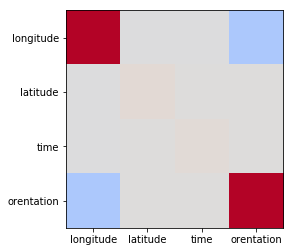

In [159]:
plt.figure(1)
plt.imshow(C, vmin=-3, vmax=3, cmap="coolwarm")
# plt.colorbar()
plt.xticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.yticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.show()

In [160]:
import sys
import os
sys.path.append(os.path.abspath("../"))

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from learn import angdist

ln = LinearRegression(n_jobs=3)
nn = MLPRegressor(hidden_layer_sizes=(360,), activation='logistic', alpha=1e-4, solver='adam', max_iter=500)

ln.fit(xxx[:, :3], xxx[:, 3])
p_ln = ln.predict(xxx[:, :3])
acc_ln = 1 - angdist(xxx[:, 3], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

nn.fit(xxx[:, :3], xxx[:, 3])
p_nn = nn.predict(xxx[:, :3])
acc_nn = 1 - angdist(xxx[:, 3], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.53422464517
Neural Network      - Accuracy: 0.534178927185


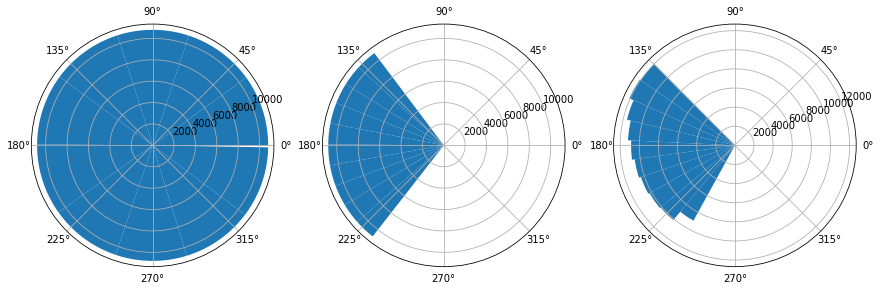

In [161]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_nn)
plt.show()

In [162]:
xxxx = np.concatenate((np.sin(xx[:, 0])[:, np.newaxis], np.cos(xx[:, 0])[:, np.newaxis],
                       tt[:, np.newaxis], np.deg2rad(yy[:, np.newaxis])), axis=-1)
print xxxx.shape

(108000, 4)


In [163]:
mu = xxxx.mean(axis=0)
C = (xxxx-mu).T.dot(xxxx-mu) / xxxx.shape[0]

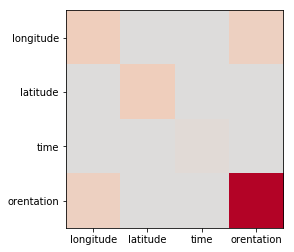

In [164]:
plt.figure(1)
plt.imshow(C, vmin=-3, vmax=3, cmap="coolwarm")
# plt.colorbar()
plt.xticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.yticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.show()

In [165]:
ln.fit(xxxx[:, :3], xxxx[:, 3])
p_ln = ln.predict(xxxx[:, :3])
acc_ln = 1 - angdist(xxxx[:, 3], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

nn.fit(xxxx[:, :3], xxxx[:, 3])
p_nn = nn.predict(xxxx[:, :3])
acc_nn = 1 - angdist(xxxx[:, 3], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.567897108121
Neural Network      - Accuracy: 0.565839007052


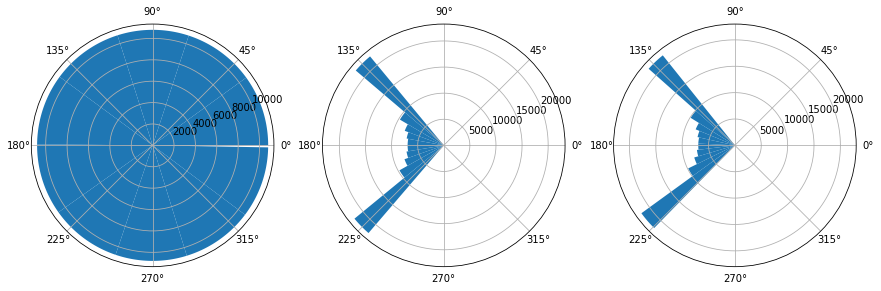

In [166]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_nn)
plt.show()

In [124]:
xx = np.concatenate(d_x, axis=0)
yy = np.concatenate(d_y, axis=0)

print xx.shape, yy.shape

(107988, 2) (107988,)


In [126]:
xxx = np.concatenate((xx, np.deg2rad(yy[:, np.newaxis])), axis=-1)
print xxx.shape
print xxx.min(axis=0)
print xxx.max(axis=0)

mu = xxx.mean(axis=0)
C = (xxx-mu).T.dot(xxx-mu) / xxx.shape[0]

(107988, 3)
[ -6.89530838e-03  -5.77182571e-05   0.00000000e+00]
[  9.69627362e-06   5.77337874e-05   6.26573201e+00]


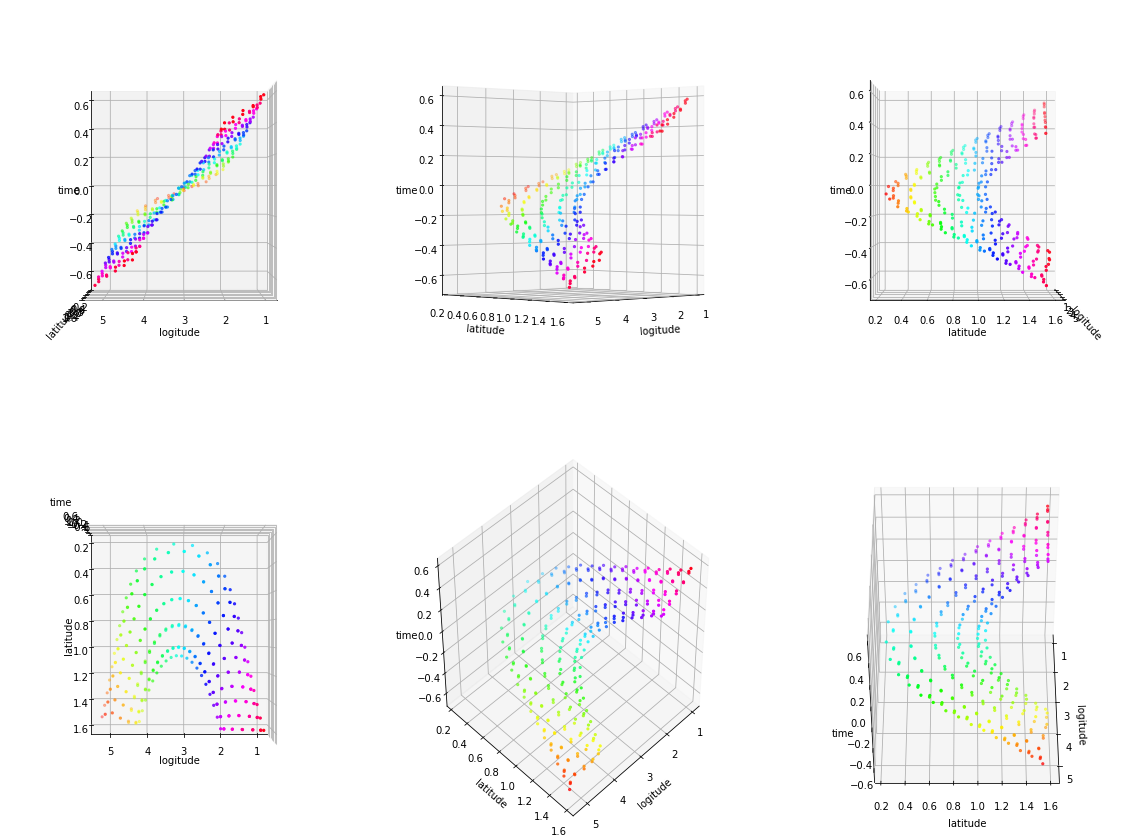

In [176]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(1, figsize=(20, 15))
ax = plt.subplot(231, projection='3d')
ax.scatter3D(xxx[:, 0][xxx[:, 3]==0], xxx[:, 1][xxx[:, 3]==0], xxx[:, 2][xxx[:, 3]==0],
             marker='.', c=xxx[:, 1][xxx[:, 3]==0], cmap='hsv')
ax.set_xlabel("logitude")
ax.set_ylabel("latitude")
ax.set_zlabel("time")
ax.view_init(0, 90)
ax = plt.subplot(232, projection='3d')
ax.scatter3D(xxx[:, 0][xxx[:, 3]==0], xxx[:, 1][xxx[:, 3]==0], xxx[:, 2][xxx[:, 3]==0],
             marker='.', c=xxx[:, 1][xxx[:, 3]==0], cmap='hsv')
ax.set_xlabel("logitude")
ax.set_ylabel("latitude")
ax.set_zlabel("time")
ax.view_init(0, 45)
ax = plt.subplot(233, projection='3d')
ax.scatter3D(xxx[:, 0][xxx[:, 3]==0], xxx[:, 1][xxx[:, 3]==0], xxx[:, 2][xxx[:, 3]==0],
             marker='.', c=xxx[:, 1][xxx[:, 3]==0], cmap='hsv')
ax.set_xlabel("logitude")
ax.set_ylabel("latitude")
ax.set_zlabel("time")
ax.view_init(0, 0)
ax = plt.subplot(234, projection='3d')
ax.scatter3D(xxx[:, 0][xxx[:, 3]==0], xxx[:, 1][xxx[:, 3]==0], xxx[:, 2][xxx[:, 3]==0],
             marker='.', c=xxx[:, 2][xxx[:, 3]==0], cmap='hsv')
ax.set_xlabel("logitude")
ax.set_ylabel("latitude")
ax.set_zlabel("time")
ax.view_init(90, 90)
ax = plt.subplot(235, projection='3d')
ax.scatter3D(xxx[:, 0][xxx[:, 3]==0], xxx[:, 1][xxx[:, 3]==0], xxx[:, 2][xxx[:, 3]==0],
             marker='.', c=xxx[:, 2][xxx[:, 3]==0], cmap='hsv')
ax.set_xlabel("logitude")
ax.set_ylabel("latitude")
ax.set_zlabel("time")
ax.view_init(45, 45)
ax = plt.subplot(236, projection='3d')
ax.scatter3D(xxx[:, 0][xxx[:, 3]==0], xxx[:, 1][xxx[:, 3]==0], xxx[:, 2][xxx[:, 3]==0],
             marker='.', c=xxx[:, 2][xxx[:, 3]==0], cmap='hsv')
ax.set_xlabel("logitude")
ax.set_ylabel("latitude")
ax.set_zlabel("time")
ax.view_init(45, 0)
plt.show()

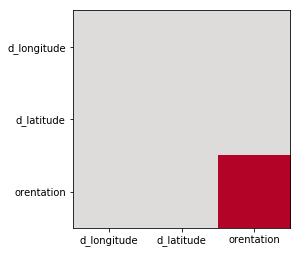

In [127]:
plt.figure(1)
plt.imshow(C, vmin=-3, vmax=3, cmap="coolwarm")
# plt.colorbar()
plt.xticks([0, 1, 2], ["d_longitude", "d_latitude", "orentation"])
plt.yticks([0, 1, 2], ["d_longitude", "d_latitude", "orentation"])
plt.show()

In [128]:
ln.fit(xxx[:, :2], xxx[:, 2])
p_ln = ln.predict(xxx[:, :2])
acc_ln = 1 - angdist(xxx[:, 2], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

nn.fit(xxx[:, :2], xxx[:, 2])
p_nn = nn.predict(xxx[:, :2])
acc_nn = 1 - angdist(xxx[:, 2], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.502438579937
Neural Network      - Accuracy: 0.500062169513


In [179]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp = GaussianProcessRegressor()
gp.fit(xxx[:, :3], xxx[:, 3])

p_gp, sigma2_gp = gp.predict(xxx, eval_MSE=True)
acc_ln = 1 - angdist(xxx[:, 3], p_gp).mean() / np.pi
print "Gaussian Process   - Accuracy:", acc_ln

108000


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


MemoryError: 